In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report, balanced_accuracy_score
import xgboost as xgb


sns.set_theme(style="whitegrid")


In [263]:
from seaborn import load_dataset
penguins = load_dataset('penguins')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [264]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [265]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


c:\Users\corral02\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

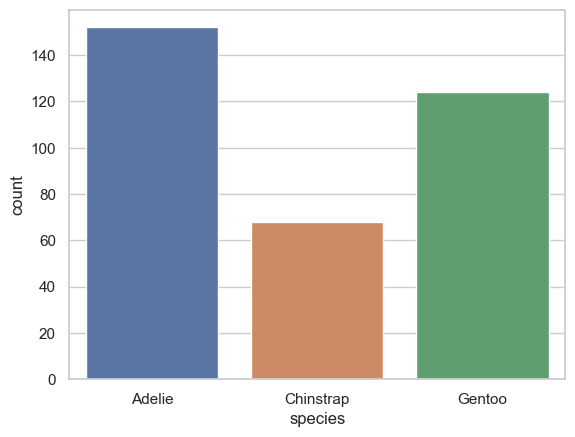

In [266]:
sns.countplot(penguins['species'],label="Count")

c:\Users\corral02\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='island', ylabel='count'>

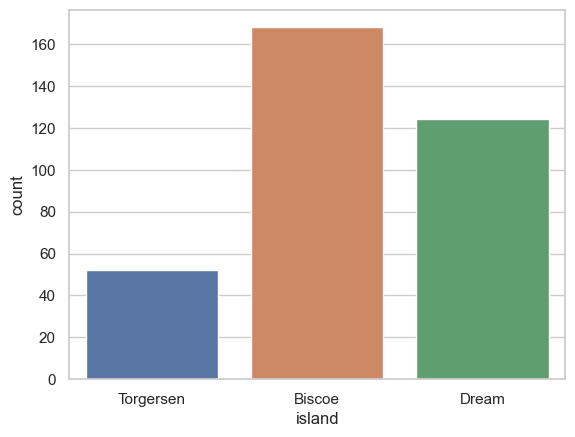

In [267]:
sns.countplot(penguins['island'],label="Count")

In [268]:
def hist_box_plot(df, columna, altura=15, larg=5):
    fig, axes = plt.subplots(1, 2, figsize=(altura, larg))
    sns.histplot(ax=axes[0], data = df[columna]);
    axes[0].set_title(f'Histograma de {columna}')
    sns.histplot(ax=axes[1], data = df[columna]);
    axes[1].set_title(f'Histograma de {columna}')
    plt.show();

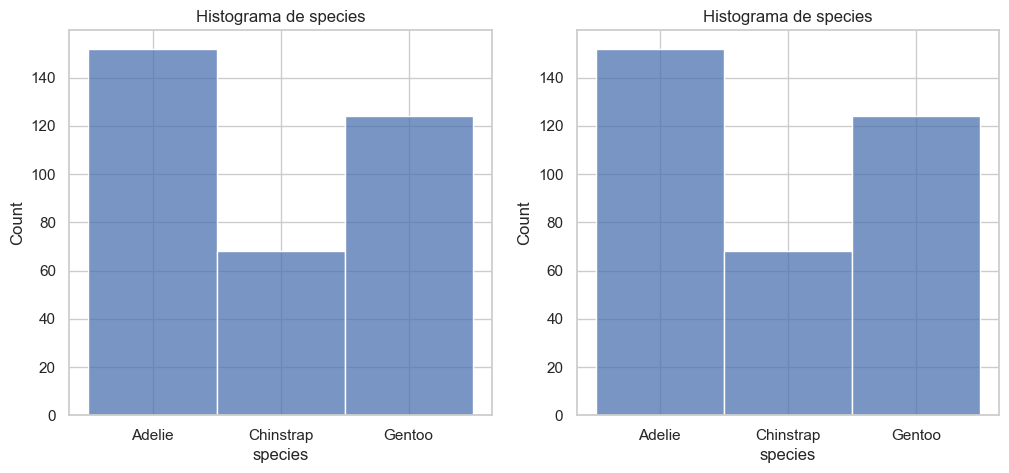

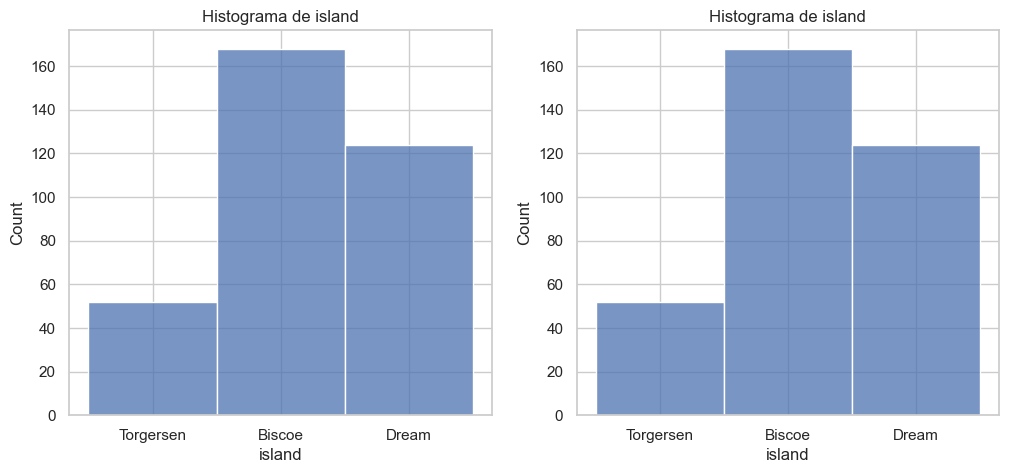

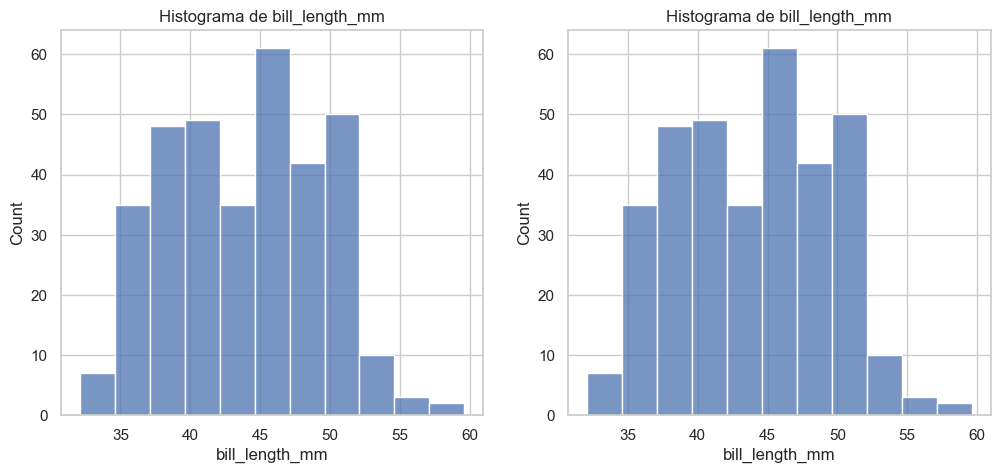

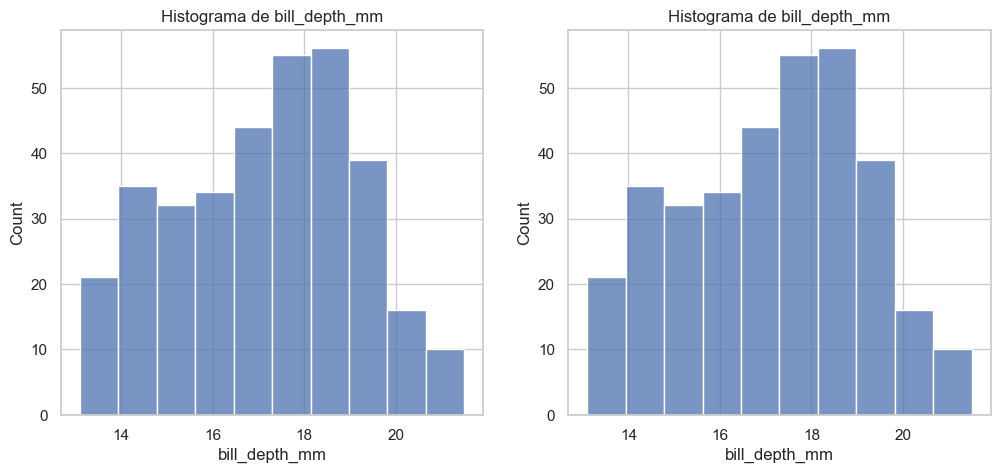

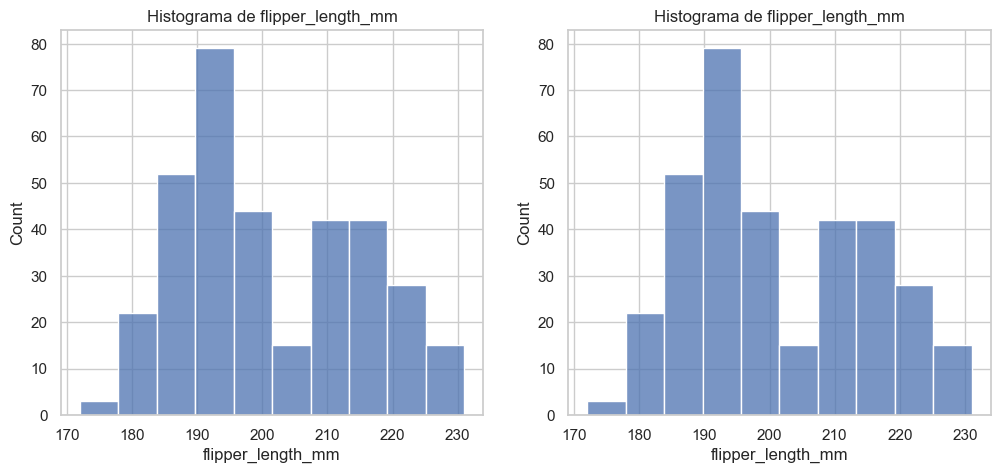

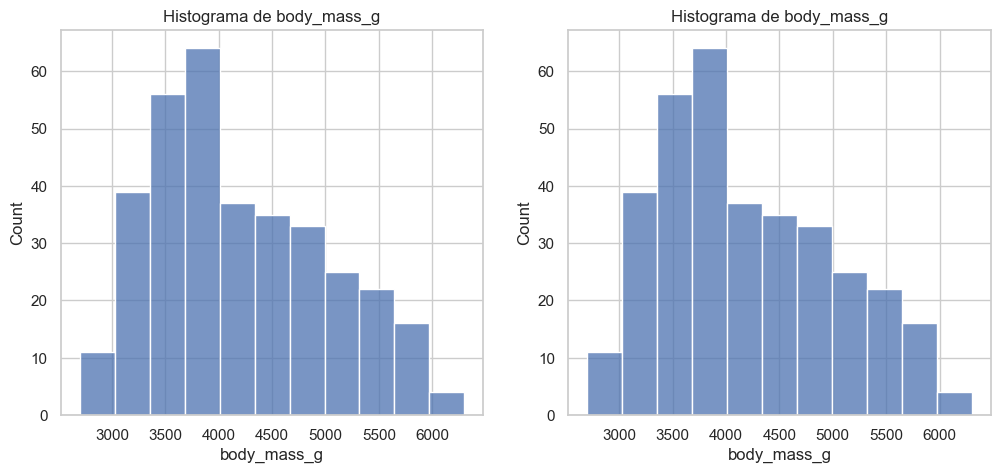

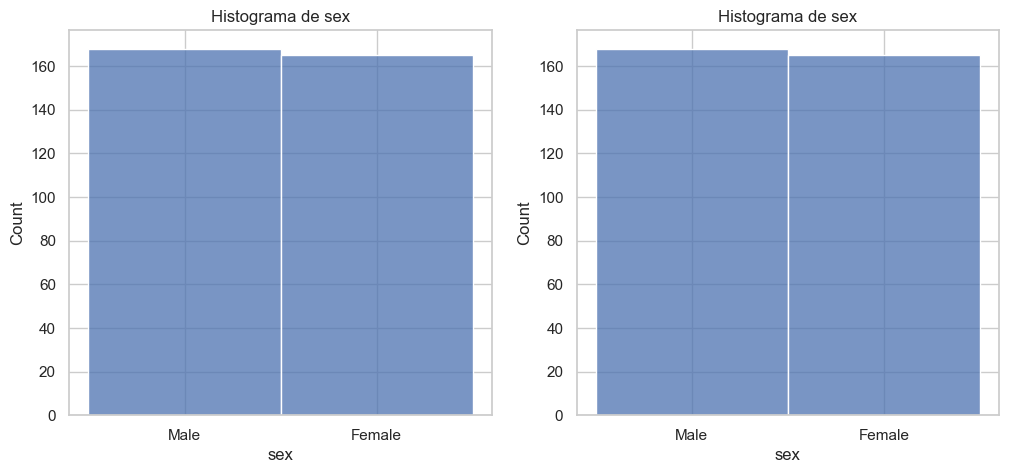

In [269]:
for col in penguins.iloc[:, 0:].columns:
    hist_box_plot(penguins, columna=col, altura=12)

In [270]:
penguins.shape

(344, 7)

In [271]:
penguins = penguins.dropna()

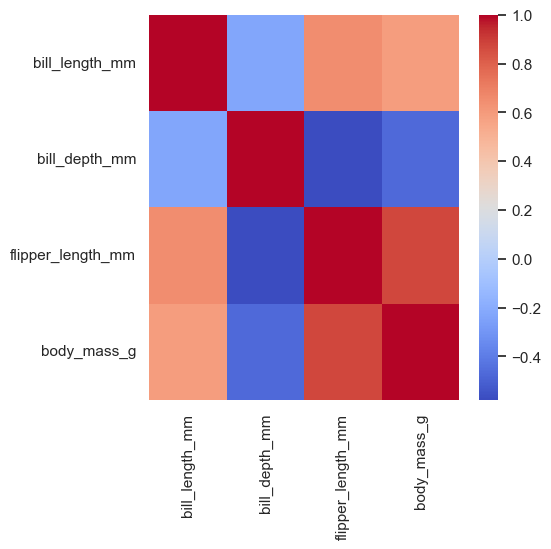

In [272]:
corr = penguins.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [273]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
penguins["sex"] = lb.fit_transform(penguins["sex"])
penguins["island"] = lb.fit_transform(penguins["island"])
#penguins["species"] = lb.fit_transform(penguins["species"])

#penguins['sex'][:5]

In [274]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [275]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


In [276]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,0,47.2,13.7,214.0,4925.0,0
340,Gentoo,0,46.8,14.3,215.0,4850.0,0
341,Gentoo,0,50.4,15.7,222.0,5750.0,1
342,Gentoo,0,45.2,14.8,212.0,5200.0,0


In [277]:
penguins.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.651652,43.992793,17.164865,200.966967,4207.057057,0.504505
std,0.714715,5.468668,1.969235,14.015765,805.215802,0.500732
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


<AxesSubplot:>

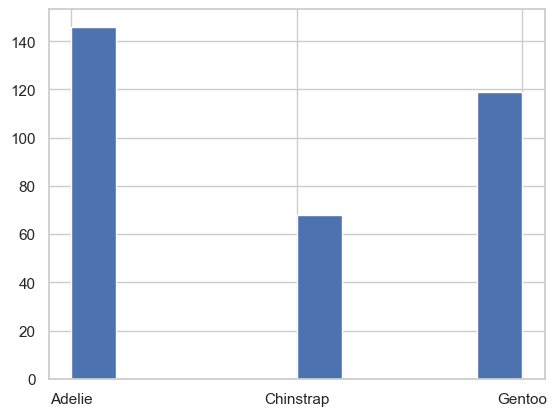

In [278]:
penguins['species'].hist()

In [279]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

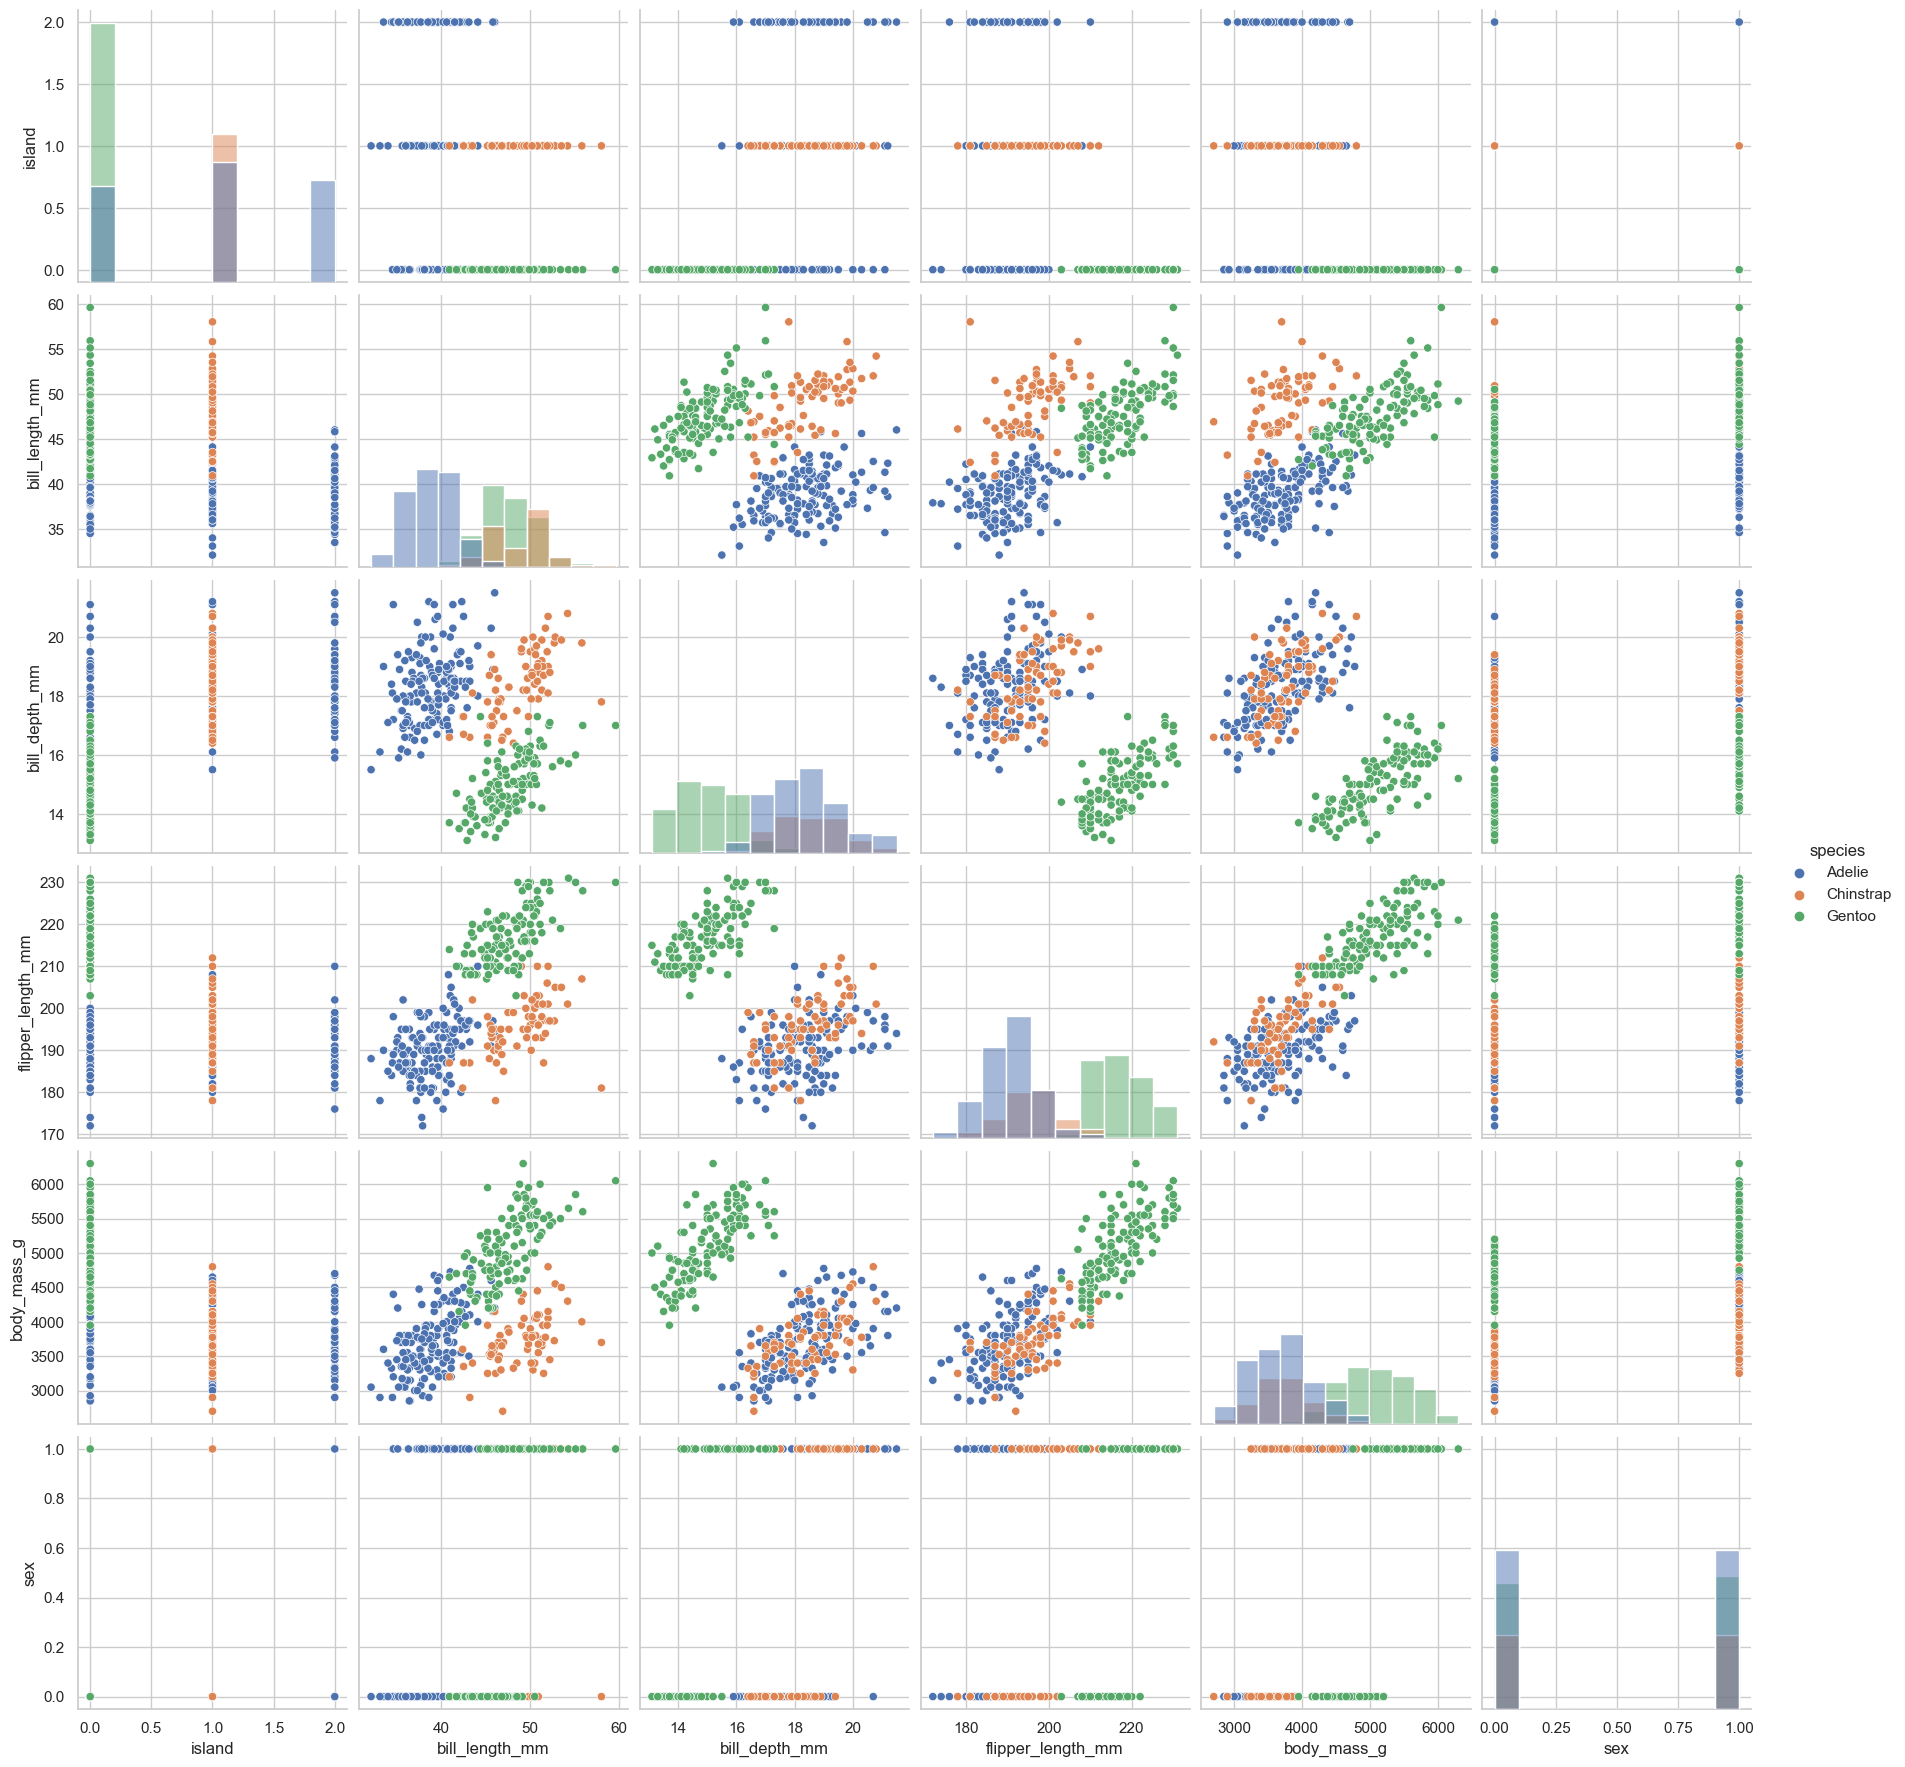

In [280]:
sns.pairplot(penguins, hue="species", height=3,diag_kind="hist")

In [281]:
X = penguins[penguins.drop('species', axis = 1).columns]
y = penguins['species']

In [282]:
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0
340,0,46.8,14.3,215.0,4850.0,0
341,0,50.4,15.7,222.0,5750.0,1
342,0,45.2,14.8,212.0,5200.0,0


In [283]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [284]:
from matplotlib.pyplot import title


def evalua_modelo (model, X, y):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    mat = sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=['Adelie','Chinstrap', 'Gentoo'] , annot=True)
    
    return eval_df, mat


    
        

AxesSubplot(0.125,0.11;0.62x0.77)


,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTree,0.97,0.97,0.97,0.97,0.965397


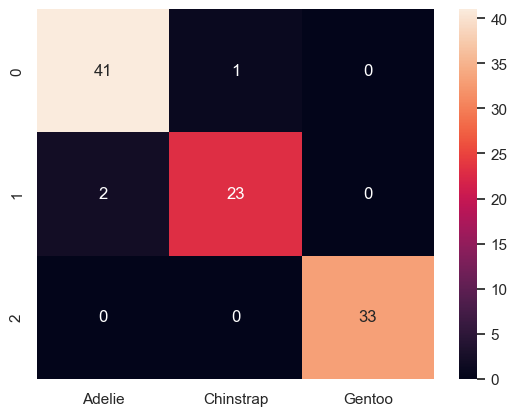

In [285]:
decision_tree = DecisionTreeClassifier(max_depth=3)
results, graf = evalua_modelo(decision_tree, X, y)
results.index = ['DecisionTree']
#rfc_result, graf = evalua_modelo(rfc, X, y)
#rfc_result.index = ['RandomForest']
#results = results.append(rfc_result)
print(graf)
results


#decision_tree = DecisionTreeClassifier(max_depth=3)
#decision_tree_results, graf = evalua_modelo(decision_tree, X, y)
#print( decision_tree_results)
#decision_tree_results.index = ['DecisionTree']
#results = results.append(decision_tree_results)
#print(graf)
#results

In [286]:
#decision_tree = DecisionTreeClassifier(max_depth=3)
#decision_tree_results, graf = evalua_modelo(decision_tree, X, y)
#print( decision_tree_results)
#decision_tree_results.index = ['DecisionTree']
#results = results.append(decision_tree_results)
#print(graf)
#results



AxesSubplot(0.125,0.11;0.62x0.77)


C:\Users\corral02\AppData\Local\Temp\1\ipykernel_13288\2613320697.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(knn)


,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTree,0.97,0.97,0.97,0.97,0.965397
KNearsNeighbors,1.00,1.00,1.00,1.00,1.000000


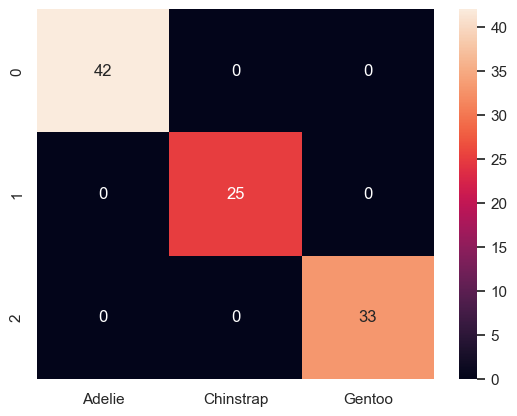

In [287]:
knn = KNeighborsClassifier(n_neighbors=3)
knn, graf = evalua_modelo(knn, X, y)
knn.index =['KNearsNeighbors']
results = results.append(knn)
print(graf)
results

AxesSubplot(0.125,0.11;0.62x0.77)


C:\Users\corral02\AppData\Local\Temp\1\ipykernel_13288\3645013722.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rfc_result)


,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTree,0.97,0.97,0.97,0.97,0.965397
KNearsNeighbors,1.00,1.00,1.00,1.00,1.000000
RandomForest,1.00,1.00,1.00,1.00,1.000000


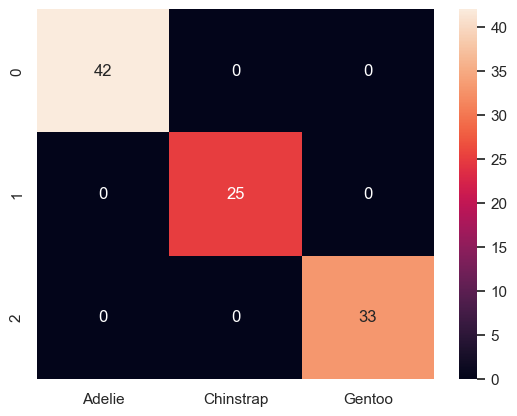

In [288]:
rfc = RandomForestClassifier(max_depth=3)
rfc_result, graf = evalua_modelo(rfc, X, y)
rfc_result.index = ['RandomForest']
results = results.append(rfc_result)
print(graf)
results

In [289]:
print(results.iloc[:5,0])
print(results.iloc[:5,1])
print(results.iloc[:5,2])
print(results.iloc[:5,3])


DecisionTree       0.97
KNearsNeighbors    1.00
RandomForest       1.00
Name: accuracy, dtype: float64
DecisionTree       0.97
KNearsNeighbors    1.00
RandomForest       1.00
Name: f1_score, dtype: float64
DecisionTree       0.97
KNearsNeighbors    1.00
RandomForest       1.00
Name: precision, dtype: float64
DecisionTree       0.97
KNearsNeighbors    1.00
RandomForest       1.00
Name: recall, dtype: float64


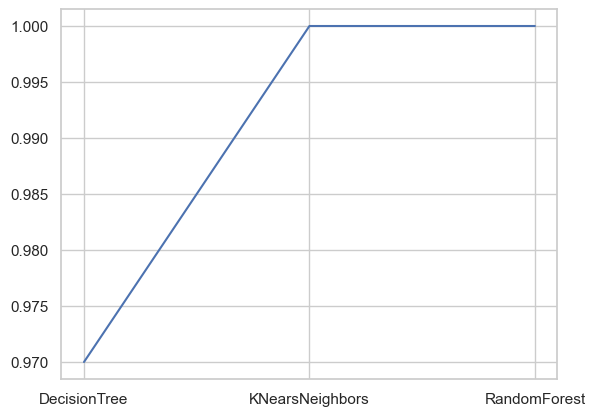

In [290]:
print(plt.plot(results.iloc[:5,0],label='accuracy'))

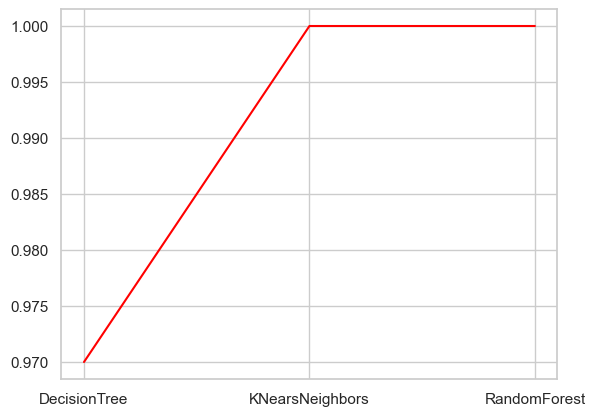

In [291]:
print(plt.plot(results.iloc[:5,1],label='F1',color='red'))

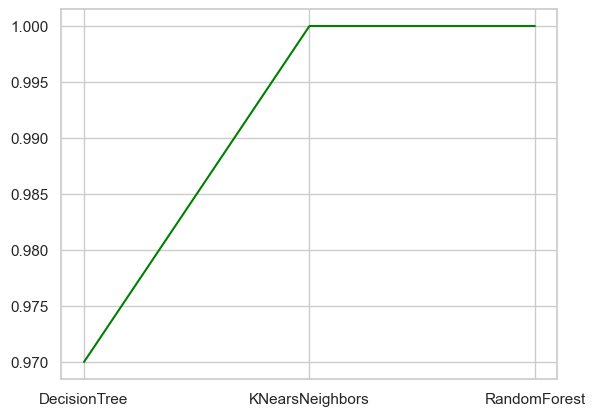

In [292]:
print(plt.plot(results.iloc[:5,2],label='Precision',color='green'))

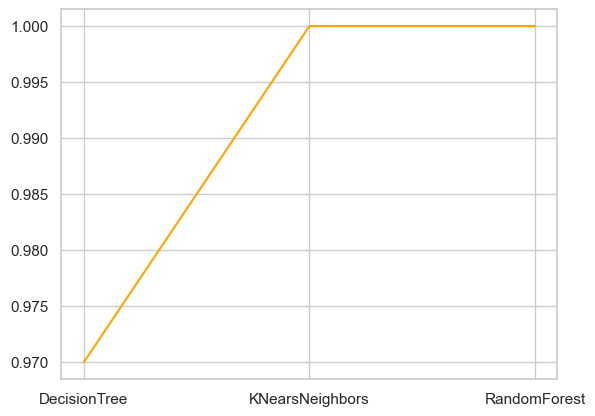

In [293]:
print(plt.plot(results.iloc[:5,3],label='recall',color='orange'))

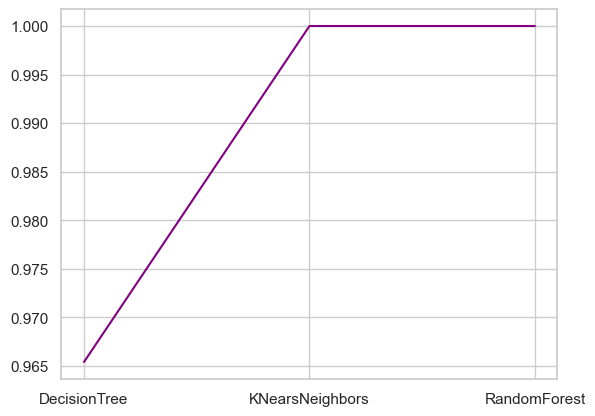

In [294]:
print(plt.plot(results.iloc[:5,4],label='balanced_accuracy',color='purple'))